In [2]:
%config IPCompleter.greedy=True
import pandas as pd
import sqlite3
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [5]:
train_df = pd.read_csv('./articles_train.tsv', index_col=False, sep='\t')
validate_df = pd.read_csv('./articles_validate.tsv', index_col=False, sep='\t')
test_df = pd.read_csv('./articles_test.tsv', index_col=False, sep='\t')
df=pd.concat([train_df, validate_df, test_df])
print(df['polarity'].value_counts(dropna=False))
print(df.shape)

Right         102093
Lean Left      87967
Left           83015
Center         74655
Lean Right     53419
Name: polarity, dtype: int64
(401149, 11)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401149 entries, 0 to 4011
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      401149 non-null  int64 
 1   article_id      401149 non-null  object
 2   date            401149 non-null  object
 3   source          401149 non-null  object
 4   title           401149 non-null  object
 5   content         401149 non-null  object
 6   url             401149 non-null  object
 7   reliability     401149 non-null  object
 8   resolved_url    401149 non-null  object
 9   article_domain  401149 non-null  object
 10  polarity        401149 non-null  object
dtypes: int64(1), object(10)
memory usage: 36.7+ MB


In [7]:
df['length'] = df['content'].apply(lambda x: len(x.split()))

In [8]:
df.head()

Unnamed: 0                                                                                       article_id        date              source                                                                        title  \
0      335836    npr--2020-11-12--Asia-Pacific Allies Speak With Biden As Transition Continues To Move Forward  2020-11-12                 npr  asiapacific allies speak with biden as transition continues to move forward   
1      286495                                              dailybeast--2020-10-06--Trump to America: Drop Dead  2020-10-06          dailybeast                                                   trump to america drop dead   
2      350359                        thenation--2020-11-24--Diane Cook’s Morality Tales for Our Climate Future  2020-11-24           thenation                            diane cooks morality tales for our climate future   
3      341470  whatreallyhappened--2020-11-17--European police in coordinated raids against online hate speech  2020-11-17  whatreallyhappened              european police in coordinated raids against online hate speech   
4      252201           washingtontimes--2020-09-06--Germany ups pressure on Russia in Navalny poisoning probe  2020-09-06     washingtontimes                    germany ups pressure on russia in navalny poisoning probe   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [9]:
df['length'].max(), df['length'].min(), df['length'].mean()

(58683, 3, 549.3512036674653)

In [10]:
df.describe()

,Unnamed: 0,length
count,"401,149.00","401,149.00"
mean,"201,339.40",549.35
std,"116,347.42",634.29
min,0.00,3.00
25%,"100,607.00",190.00
50%,"201,131.00",408.00
75%,"301,996.00",720.00
max,"403,203.00","58,683.00"


In [19]:
import math
#df = train_df.query('length<=2500 & length>=100')
w = 500
n = math.ceil((df['length'].max() - df['length'].min())/w)
print(n)
print(df.describe())
#ax = plt.hist(data, bins = n)

118
                Unnamed: 0               length
count           401,149.00           401,149.00
mean            201,339.40               549.35
std             116,347.42               634.29
min                   0.00                 3.00
25%             100,607.00               190.00
50%             201,131.00               408.00
75%             301,996.00               720.00
max             403,203.00            58,683.00


<AxesSubplot:>

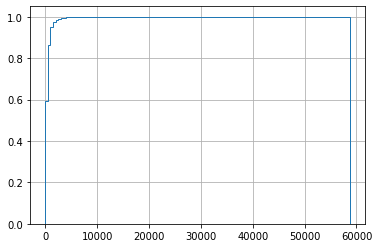

In [20]:
df['length'].hist(bins=n, density=True, histtype='step', cumulative=True)

In [21]:
df['length'].value_counts(bins=n, normalize=True)

(-55.681, 500.288]                       0.59
(500.288, 997.576]                       0.27
(997.576, 1494.864]                      0.09
(1494.864, 1992.153]                     0.02
(1992.153, 2489.441]                     0.01
(2489.441, 2986.729]                     0.01
(2986.729, 3484.017]                     0.00
(3484.017, 3981.305]                     0.00
(3981.305, 4478.593]                     0.00
(4478.593, 4975.881]                     0.00
(4975.881, 5473.169]                     0.00
(5473.169, 5970.458]                     0.00
(6467.746, 6965.034]                     0.00
(5970.458, 6467.746]                     0.00
(6965.034, 7462.322]                     0.00
(7462.322, 7959.61]                      0.00
(7959.61, 8456.898]                      0.00
(8456.898, 8954.186]                     0.00
(8954.186, 9451.475]                     0.00
(9948.763, 10446.051]                    0.00
(10446.051, 10943.339]                   0.00
(9451.475, 9948.763]              

<AxesSubplot:>

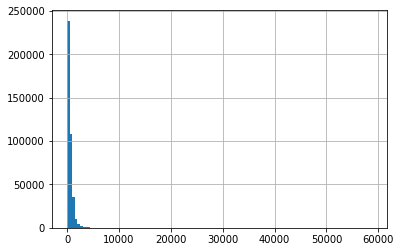

In [22]:

df['length'].hist(bins=n)


In [23]:
cutoff_df = df.query('length>=2000')
print(cutoff_df['length'].value_counts())
print(cutoff_df.shape)

2027     20
2113     19
2053     18
2083     18
2078     17
2020     17
2038     17
2036     17
2210     16
2019     16
2465     16
2051     16
2061     16
2013     16
2080     16
2055     16
2047     16
2108     15
2006     15
2077     15
2062     15
2391     15
2262     15
2208     14
2029     14
2028     14
2182     14
2824     14
2054     14
2086     14
2121     14
2226     14
2023     14
2111     14
2352     14
2042     14
2072     14
2332     14
2246     14
2138     14
2207     14
2148     14
2168     14
2064     14
2295     14
2004     14
2265     14
2442     14
2034     13
2141     13
2173     13
2129     13
2001     13
2553     13
2154     13
2048     13
2081     13
2115     13
2135     13
2471     13
2185     13
2057     13
2024     13
2037     13
2089     13
2098     13
2104     13
2254     13
2021     13
2283     13
2060     13
2011     13
2109     13
2157     12
2235     12
2122     12
2052     12
2127     12
2159     12
2447     12
2422     12
2167     12
2069     12
2136

Looks like we we can cut-off the max token length at 2000.

In [24]:
cutoff_df = df.query('length<=2000 & length>=10')
w = 5
n = math.ceil((cutoff_df['length'].max() - cutoff_df['length'].min())/w)
print(n)
print(cutoff_df.describe())

398
                Unnamed: 0               length
count           388,192.00           388,192.00
mean            201,640.95               484.89
std             116,388.78               402.47
min                   0.00                10.00
25%             100,792.75               189.00
50%             201,780.50               400.00
75%             302,317.25               689.00
max             403,203.00             2,000.00


<AxesSubplot:>

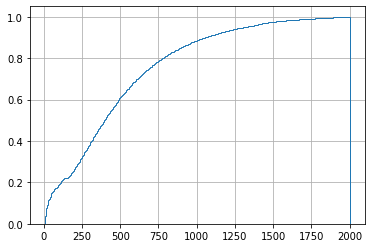

In [25]:
cutoff_df['length'].hist(bins=n, density=True, histtype='step', cumulative=True)
#print(df['length'].value_counts(bins=n, normalize=True))

In [26]:
cutoff_df['length'].value_counts(bins=n, normalize=False, sort=False)

(8.009, 15.0]       17856
(15.0, 20.0]        12811
(20.0, 25.0]         4647
(25.0, 30.0]         4264
(30.0, 35.0]         4745
(35.0, 40.0]         2999
(40.0, 45.0]         4432
(45.0, 50.0]         3237
(50.0, 55.0]         2464
(55.0, 60.0]         2718
(60.0, 65.0]         1844
(65.0, 70.0]         1922
(70.0, 75.0]         1605
(75.0, 80.0]         1255
(80.0, 85.0]         1540
(85.0, 90.0]         1414
(90.0, 95.0]         1610
(95.0, 100.0]        1824
(100.0, 105.0]       1619
(105.0, 110.0]       1826
(110.0, 115.0]       1829
(115.0, 120.0]       1854
(120.0, 125.0]       2343
(125.0, 130.0]       1755
(130.0, 135.0]        907
(135.0, 140.0]        314
(140.0, 145.0]         44
(145.0, 150.0]         36
(150.0, 155.0]        115
(155.0, 160.0]        337
(160.0, 165.0]       1695
(165.0, 170.0]       1866
(170.0, 175.0]       2234
(175.0, 180.0]       1992
(180.0, 185.0]       1895
(185.0, 190.0]       1996
(190.0, 195.0]       2037
(195.0, 200.0]       2148
(200.0, 205.

<AxesSubplot:>

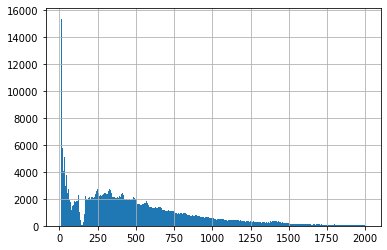

In [27]:
cutoff_df['length'].hist(bins=n)

In [28]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388192 entries, 0 to 4011
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      388192 non-null  int64 
 1   article_id      388192 non-null  object
 2   date            388192 non-null  object
 3   source          388192 non-null  object
 4   title           388192 non-null  object
 5   content         388192 non-null  object
 6   url             388192 non-null  object
 7   reliability     388192 non-null  object
 8   resolved_url    388192 non-null  object
 9   article_domain  388192 non-null  object
 10  polarity        388192 non-null  object
 11  length          388192 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 38.5+ MB


In [43]:
cutoff_df = cutoff_df[['content','polarity']]
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388192 entries, 0 to 4011
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   content   388192 non-null  object
 1   polarity  388192 non-null  object
dtypes: object(2)
memory usage: 8.9+ MB


In [58]:
cutoff_df['polarity'] = cutoff_df['polarity'].apply(lambda x: ''.join(x.split()))

In [59]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
cutoff_df['label'] = LE.fit_transform(cutoff_df['polarity'])
cutoff_df.head()

content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [68]:
cutoff_df['polarity'].value_counts(dropna=True)

Right        99816
LeanLeft     84450
Left         78932
Center       72891
LeanRight    52103
Name: polarity, dtype: int64

In [60]:
train_df, validate_df = train_test_split(cutoff_df, test_size=0.2, random_state=42, stratify=cutoff_df[['polarity']])

In [61]:
validate_df, test_df = train_test_split(validate_df, test_size=0.1, random_state=42, stratify=validate_df[['polarity']])

In [69]:
print(train_df.info())
print(validate_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310553 entries, 166081 to 10418
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   content   310553 non-null  object
 1   polarity  310553 non-null  object
 2   label     310553 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69875 entries, 108465 to 185887
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   69875 non-null  object
 1   polarity  69875 non-null  object
 2   label     69875 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7764 entries, 36822 to 6421
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   7764 non-null   object
 1   polarity  7764 non-null   object
 2   label     

In [63]:
train_df.to_csv('./v1/articles_train.tsv', sep='\t', index=False) 
validate_df.to_csv('./v1/articles_validate.tsv', sep='\t', index=False) 
test_df.to_csv('./v1/articles_test.tsv', sep='\t', index=False) 

In [67]:
train_df.sample(10)

content  \
17733                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [71]:
print(train_df['label'].value_counts(dropna=True))
print(validate_df['label'].value_counts(dropna=True))
print(test_df['label'].value_counts(dropna=True))

4    79853
1    67560
3    63145
0    58313
2    41682
Name: label, dtype: int64
4    17967
1    15201
3    14208
0    13120
2     9379
Name: label, dtype: int64
4    1996
1    1689
3    1579
0    1458
2    1042
Name: label, dtype: int64
